In [1]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import dlib

In [2]:
facerec_model = "/Users/outianyi/Computer_Vision/dlib_face_recognition_resnet_model_v1.dat"
face_recognizer = dlib.face_recognition_model_v1(facerec_model)
model = '/Users/outianyi/Computer_Vision/shape_predictor_68_face_landmarks.dat'
predictor = dlib.shape_predictor(model)

In [3]:
face_path = '/Users/outianyi/Computer_Vision/lfw-deepfunneled'  # 这是所有人脸的名称

In [4]:
# 将face_path 下所有文件夹中超过两个以上图片的文件路径保存下来
def get_face_path(face_path):
    face_path_list = []
    for dirpath, dirnames, filenames in os.walk(face_path):
        if len(filenames) >= 2:
            # print(dirpath)
            # print(dirnames)
            # print(filenames[0])
            for filename in filenames:
                face_path_list.append(os.path.join(dirpath, filename))
                # face_path_list.append(face_path + '/' + filename)
    return face_path_list


ovr_2_faces_paths = get_face_path(face_path)
ovr_2_faces_paths[:20]

['/Users/outianyi/Computer_Vision/lfw-deepfunneled/Paul_McNulty/Paul_McNulty_0002.jpg',
 '/Users/outianyi/Computer_Vision/lfw-deepfunneled/Paul_McNulty/Paul_McNulty_0001.jpg',
 '/Users/outianyi/Computer_Vision/lfw-deepfunneled/Claudia_Pechstein/Claudia_Pechstein_0001.jpg',
 '/Users/outianyi/Computer_Vision/lfw-deepfunneled/Claudia_Pechstein/Claudia_Pechstein_0003.jpg',
 '/Users/outianyi/Computer_Vision/lfw-deepfunneled/Claudia_Pechstein/Claudia_Pechstein_0002.jpg',
 '/Users/outianyi/Computer_Vision/lfw-deepfunneled/Claudia_Pechstein/Claudia_Pechstein_0005.jpg',
 '/Users/outianyi/Computer_Vision/lfw-deepfunneled/Claudia_Pechstein/Claudia_Pechstein_0004.jpg',
 '/Users/outianyi/Computer_Vision/lfw-deepfunneled/Ranil_Wickremasinghe/Ranil_Wickremasinghe_0002.jpg',
 '/Users/outianyi/Computer_Vision/lfw-deepfunneled/Ranil_Wickremasinghe/Ranil_Wickremasinghe_0003.jpg',
 '/Users/outianyi/Computer_Vision/lfw-deepfunneled/Ranil_Wickremasinghe/Ranil_Wickremasinghe_0001.jpg',
 '/Users/outianyi/Comp

In [5]:
len(ovr_2_faces_paths)

9164

In [6]:
test_faces = ovr_2_faces_paths[:10]
# 读取每一个图片来识别脸，以及对应的向量
face_n_vectors = []
detector = dlib.get_frontal_face_detector()
for face in test_faces:
    print("computing...")
    img = cv2.imread(face, cv2.IMREAD_COLOR)
    dt_face = detector(img, 1)
    dt_face = dt_face[0]
    shape = predictor(img, dt_face)
    descriptor = face_recognizer.compute_face_descriptor(img, shape)
    face_n_vectors.append([face, descriptor])

computing...
computing...
computing...
computing...
computing...
computing...
computing...
computing...
computing...
computing...


In [7]:
len(face_n_vectors)

10

In [8]:
face_n_vectors[8]

['/Users/outianyi/Computer_Vision/lfw-deepfunneled/Ranil_Wickremasinghe/Ranil_Wickremasinghe_0003.jpg',
 dlib.vector([-0.127439, 0.0492188, 0.0488685, -0.00216736, -0.0530638, -0.0988934, -0.0045517, -0.135065, 0.0894597, -0.0405848, 0.135197, -0.0458947, -0.189922, -0.184553, 0.0491715, 0.126452, -0.0983507, -0.0850392, -0.101179, -0.132065, 0.0362299, -0.00974079, 0.074453, 0.0405161, -0.134412, -0.33515, -0.109205, -0.105359, -0.00995557, -0.0588383, 0.0190655, 0.124154, -0.181192, -0.0951295, -0.0124444, 0.10191, 0.0577669, -0.00439732, 0.141506, -0.0416329, -0.126261, 0.0163449, 0.0856144, 0.236289, 0.250731, 0.064326, 0.00515776, 0.0692014, 0.0940741, -0.237044, 0.0054088, 0.0729613, 0.0593251, 0.00463654, 0.0922108, -0.108152, 0.0201823, 0.0567505, -0.246843, 0.0220461, 0.00235344, -0.155199, -0.0992657, -0.00655026, 0.217328, 0.155709, -0.0800724, -0.0761436, 0.158616, -0.176133, 0.0168079, 0.0224228, -0.15107, -0.104052, -0.339738, 0.061694, 0.413853, 0.159707, -0.159918, 0.04

In [9]:
def distance(a, b):
    # 计算两个 face 向量之间的欧式距离
    return np.sqrt(np.sum(np.square(np.array(a) - np.array(b))))
    # return np.linalg.norm(np.array(a) - np.array(b), ord=2)

In [10]:
import time
time1 = time.time()
# compute each distance
final_dis = []
for vec1 in face_n_vectors:
    temp_dis = []
    for vec2 in face_n_vectors:
        temp_dis.append(distance(vec1[1], vec2[1]))
    final_dis.append(temp_dis)
time2 = time.time()
print(time2 - time1)

0.03940606117248535


In [11]:
import pandas as pd

final_dis = pd.DataFrame(final_dis)

In [12]:
final_dis

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.335159,0.907572,0.760677,0.814275,0.768759,0.866360,0.778378,0.767240,0.809356
1,0.335159,0.000000,0.895640,0.767351,0.808393,0.763866,0.847326,0.791743,0.742167,0.804422
2,0.907572,0.895640,0.000000,0.802498,0.463062,0.705554,0.367189,0.848166,0.986081,0.913602
3,0.760677,0.767351,0.802498,0.000000,0.784142,0.366782,0.849995,0.709651,0.820060,0.779397
4,0.814275,0.808393,0.463062,0.784142,0.000000,0.736869,0.432592,0.812192,0.912873,0.840468
5,0.768759,0.763866,0.705554,0.366782,0.736869,0.000000,0.758717,0.641451,0.748026,0.732273
6,0.866360,0.847326,0.367189,0.849995,0.432592,0.758717,0.000000,0.818447,0.895311,0.871009
7,0.778378,0.791743,0.848166,0.709651,0.812192,0.641451,0.818447,0.000000,0.606818,0.556560
8,0.767240,0.742167,0.986081,0.820060,0.912873,0.748026,0.895311,0.606818,0.000000,0.506351
9,0.809356,0.804422,0.913602,0.779397,0.840468,0.732273,0.871009,0.556560,0.506351,0.000000


In [13]:
test_faces

['/Users/outianyi/Computer_Vision/lfw-deepfunneled/Paul_McNulty/Paul_McNulty_0002.jpg',
 '/Users/outianyi/Computer_Vision/lfw-deepfunneled/Paul_McNulty/Paul_McNulty_0001.jpg',
 '/Users/outianyi/Computer_Vision/lfw-deepfunneled/Claudia_Pechstein/Claudia_Pechstein_0001.jpg',
 '/Users/outianyi/Computer_Vision/lfw-deepfunneled/Claudia_Pechstein/Claudia_Pechstein_0003.jpg',
 '/Users/outianyi/Computer_Vision/lfw-deepfunneled/Claudia_Pechstein/Claudia_Pechstein_0002.jpg',
 '/Users/outianyi/Computer_Vision/lfw-deepfunneled/Claudia_Pechstein/Claudia_Pechstein_0005.jpg',
 '/Users/outianyi/Computer_Vision/lfw-deepfunneled/Claudia_Pechstein/Claudia_Pechstein_0004.jpg',
 '/Users/outianyi/Computer_Vision/lfw-deepfunneled/Ranil_Wickremasinghe/Ranil_Wickremasinghe_0002.jpg',
 '/Users/outianyi/Computer_Vision/lfw-deepfunneled/Ranil_Wickremasinghe/Ranil_Wickremasinghe_0003.jpg',
 '/Users/outianyi/Computer_Vision/lfw-deepfunneled/Ranil_Wickremasinghe/Ranil_Wickremasinghe_0001.jpg']

In [14]:
def calc_cos(a, b):
    dot = np.sum(np.multiply(a, b))
    norm = np.linalg.norm(a) * np.linalg.norm(b)
    return dot / norm

In [15]:
# compute each distance
final_dis_cos = []
for vec1 in face_n_vectors:
    temp_dis = []
    for vec2 in face_n_vectors:
        temp_dis.append(calc_cos(vec1[1], vec2[1]))
    final_dis_cos.append(temp_dis)

In [16]:
final_dis_cos = pd.DataFrame(final_dis_cos)
final_dis_cos

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.972393,0.798084,0.854412,0.840534,0.849765,0.812005,0.847106,0.848021,0.832589
1,0.972393,1.000000,0.800983,0.849665,0.841153,0.849338,0.817731,0.839445,0.855375,0.832007
2,0.798084,0.800983,1.000000,0.836510,0.948223,0.872439,0.966195,0.816763,0.744613,0.784327
3,0.854412,0.849665,0.836510,1.000000,0.847588,0.964267,0.811623,0.867288,0.816839,0.837337
4,0.840534,0.841153,0.948223,0.847588,1.000000,0.864403,0.954472,0.835982,0.787134,0.822242
5,0.849765,0.849338,0.872439,0.964267,0.864403,1.000000,0.847936,0.890047,0.845031,0.854150
6,0.812005,0.817731,0.966195,0.811623,0.954472,0.847936,1.000000,0.824737,0.783336,0.798362
7,0.847106,0.839445,0.816763,0.867288,0.835982,0.890047,0.824737,1.000000,0.899579,0.916786
8,0.848021,0.855375,0.744613,0.816839,0.787134,0.845031,0.783336,0.899579,1.000000,0.928563
9,0.832589,0.832007,0.784327,0.837337,0.822242,0.854150,0.798362,0.916786,0.928563,1.000000


In [17]:
type(test_faces[9])

str

(<Axes: >, <matplotlib.image.AxesImage at 0x124d376a0>)

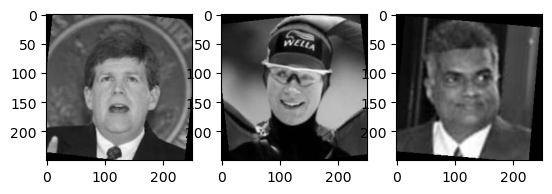

In [18]:
path1 = test_faces[0]
path2 = test_faces[5]
path3 = test_faces[9]
img1 = cv2.imread(path1, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(path2, cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread(path3, cv2.IMREAD_GRAYSCALE)
plt.subplot(131), plt.imshow(img1, "gray")
plt.subplot(132), plt.imshow(img2, "gray")
plt.subplot(133), plt.imshow(img3, "gray")